Random Value Imputation – Instead of a fixed value, missing values are replaced by randomly sampled existing values from the same feature.
Maintains the original distribution shape more than filling with a single number.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/train (1).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [6]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [7]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [8]:
# For training set
null_mask_train = X_train['Age_imputed'].isnull()
X_train.loc[null_mask_train, 'Age_imputed'] = X_train['Age'].dropna().sample(null_mask_train.sum(), random_state=42).values

# For test set
null_mask_test = X_test['Age_imputed'].isnull()
X_test.loc[null_mask_test, 'Age_imputed'] = X_train['Age'].dropna().sample(null_mask_test.sum(), random_state=42).values

In [9]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([ 9.  , 18.  , 54.  , 19.  ,  4.  , 27.  , 66.  , 30.  , 37.  ,
       25.  , 28.  ,  0.67, 14.  , 34.  , 24.  , 25.  , 34.5 , 27.  ,
       32.  ,  9.  , 29.  , 31.  , 21.  ,  5.  , 31.  , 21.  , 18.  ,
       71.  , 17.  , 41.  , 34.  , 23.  , 28.5 , 35.  , 33.  , 34.  ,
       41.  ,  2.  ,  4.  , 31.  , 31.  , 22.  , 45.  , 25.  , 23.  ,
       24.  , 51.  , 24.  ,  2.  , 33.  , 24.  ,  4.  , 34.  , 32.  ,
       17.  , 61.  , 46.  , 24.  , 20.  , 34.  , 20.  , 19.  , 16.  ,
       29.  , 16.  , 25.  , 30.  ,  2.  , 14.  , 47.  , 22.  , 32.  ,
       30.5 , 35.  ,  0.83, 19.  , 21.  , 28.  , 26.  , 30.  , 21.  ,
       21.  , 22.  , 50.  ,  1.  , 56.  , 26.  , 39.  , 25.  , 32.  ,
       17.  , 22.  , 40.  , 47.  , 15.  , 62.  , 38.  , 23.  , 27.  ,
       31.  , 40.  , 18.  ,  2.  , 63.  , 31.  , 33.  ,  9.  , 43.  ,
       43.  ,  3.  , 18.  , 21.  , 40.  , 27.  , 36.  , 21.  , 13.  ,
       14.  , 42.  , 26.  , 54.  , 30.  ,  4.  , 36.  , 19.  ,  1.  ,
       16.  , 29.  ,

In [10]:
X_train['Age'].isnull().sum()
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,18.0
493,71.0,49.5042,71.0
527,NaN,221.7792,21.0


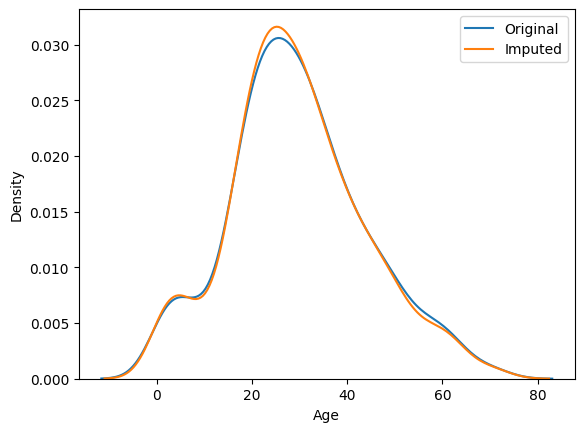

In [11]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [12]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.02896637747122


In [13]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.259863
Age,71.512440,204.349513,204.349513
Age_imputed,53.259863,204.349513,200.028966


<Axes: >

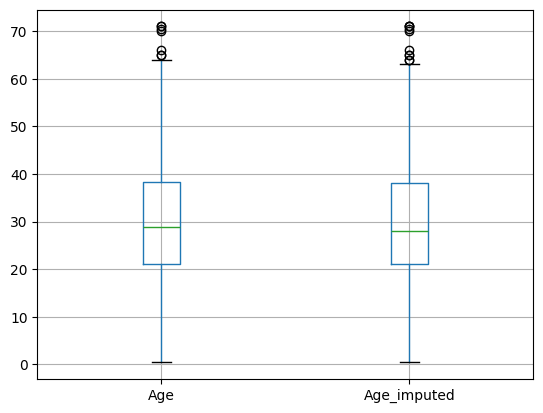

In [14]:
X_train[['Age', 'Age_imputed']].boxplot()

In [15]:
data = pd.read_csv('../Datasets/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [16]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [17]:
X = data
y = data['SalePrice']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [20]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
438,Gd,Gd,90350,Gd,Gd
358,NaN,TA,130000,TA,NaN
1276,TA,TA,162000,TA,TA
1410,NaN,TA,230000,TA,NaN
1305,Ex,TA,325000,TA,Ex


In [21]:
# GarageQual - Training set
null_mask = X_train['GarageQual_imputed'].isnull()
X_train.loc[null_mask, 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(null_mask.sum(), random_state=42).values

# GarageQual - Test set
null_mask = X_test['GarageQual_imputed'].isnull()
X_test.loc[null_mask, 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(null_mask.sum(), random_state=42).values

# FireplaceQu - Training set
null_mask = X_train['FireplaceQu_imputed'].isnull()
X_train.loc[null_mask, 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(null_mask.sum(), random_state=42).values

# FireplaceQu - Test set
null_mask = X_test['FireplaceQu_imputed'].isnull()
X_test.loc[null_mask, 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(null_mask.sum(), random_state=42).values

In [22]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [23]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.533109
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.032548


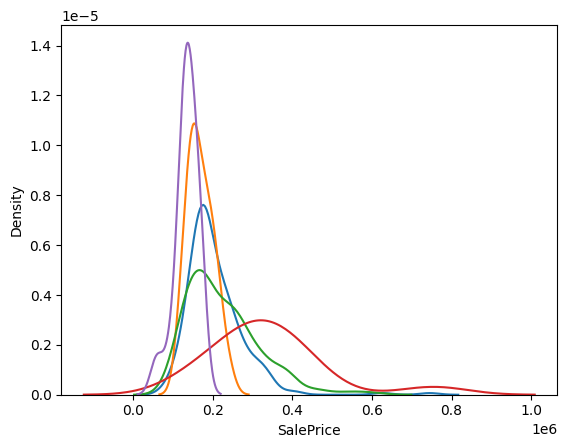

In [24]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.show()

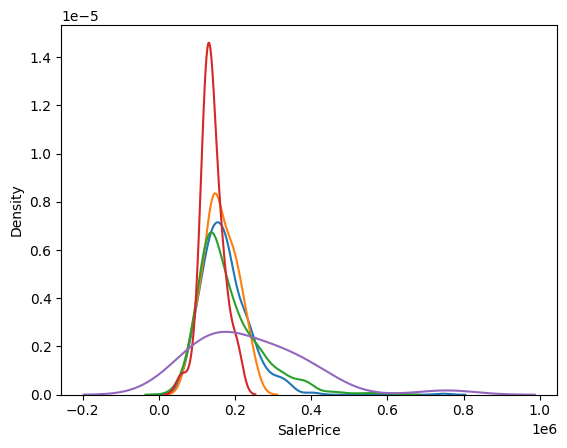

In [25]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.show()